<a href="https://colab.research.google.com/github/arpan405029/deep-learning_project/blob/main/fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
 (x_train,y_train),(x_test,y_test)  = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape 

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# Feature **Scaling**

In [6]:
x_train = x_train/255
x_test = x_test/255

# Build Neural Network

In [7]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(units=32,activation='relu'),
                                 keras.layers.Dense(units=10, activation='softmax')

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [10]:
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 16s 1ms/step - loss: 0.7123 - accuracy: 0.7604
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4294 - accuracy: 0.8506
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3939 - accuracy: 0.8607
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3645 - accuracy: 0.8706
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3540 - accuracy: 0.8720
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3357 - accuracy: 0.8804
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3309 - accuracy: 0.8794
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3164 - accuracy: 0.8860
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3086 - accuracy: 0.8880
Epoch 10/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.30

# Test And Evaluate Neural Network Model

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.3711 - accuracy: 0.8707


[0.37112125754356384, 0.8707000017166138]

In [12]:
y_pred = model.predict(x_test)

In [13]:
y_pred[0].round(2)


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
      dtype=float32)

In [14]:
np.argmax(y_pred[0].round(2))

9

In [16]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

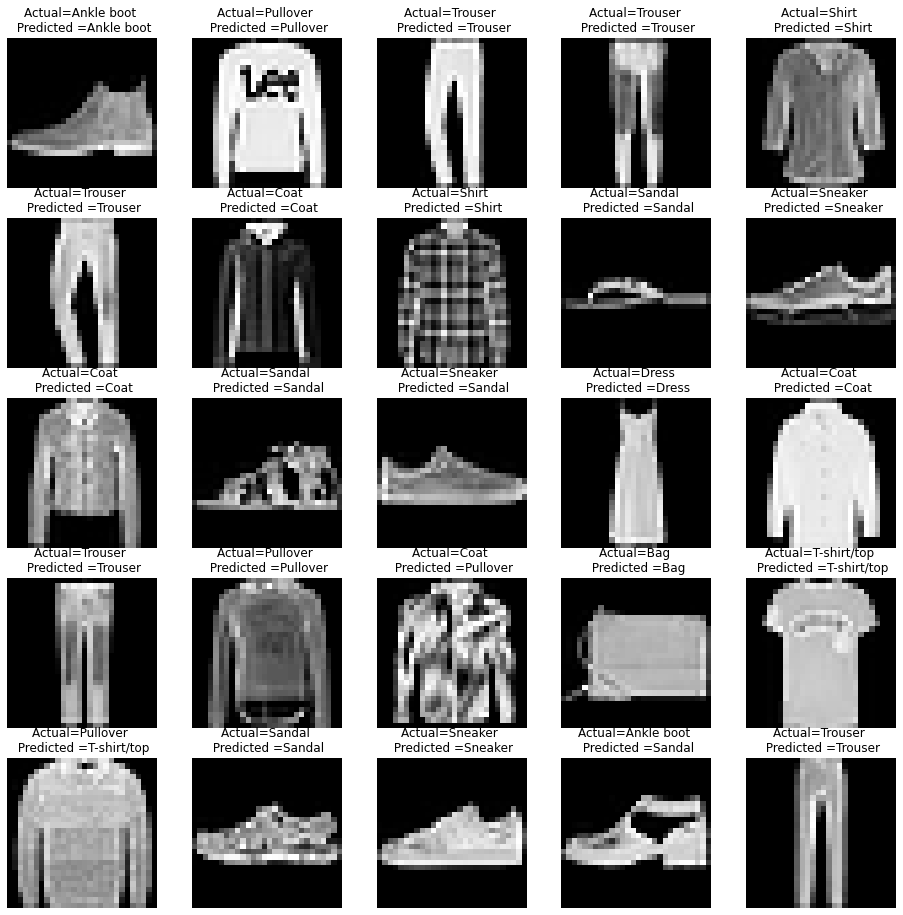

In [17]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i],cmap='gray')
  plt.axis('off')
  plt.title("Actual={} \n Predicted ={}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])] )  )

# Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

# Classification Report

In [20]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)

In [21]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.86      0.82      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.77      0.76      0.77      1000
       Dress       0.90      0.84      0.87      1000
        Coat       0.74      0.84      0.79      1000
      Sandal       0.95      0.97      0.96      1000
       Shirt       0.73      0.60      0.66      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Save Model

In [22]:
model.save("First_project_fashion_model.h5")

In [23]:
model = keras.models.load_model("First_project_fashion_model.h5")

In [ ]:
model.predict(x_test)